# Introduction 


The problem being considered in this section is the prediction of a **backorder**, this is about an order that you cannot fulfill your request for it at a given time because there is no inventory or the item is out of stock, but you can guarantee delivery of the goods on a certain date in the future. Unlike the out-of-stock situation, in the backorder situation customers can purchase the items and place the order as they will be guaranteed delivery in the future, i.e., it is an order with a delayed delivery date.

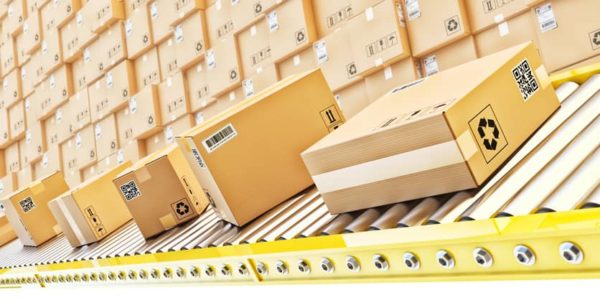

<center>Fig 1. Product storage (Figure obtained from  <a href="https://retos-operaciones-logistica.eae.es/como-gestionar-un-backorder/">here</a>
). </center>


## why backorders are a real problem?

For many companies and businesses currently spread their products online with them there are platforms like [Amazon](https://www.amazon.com/) that helps some to share the products, but these tend to be run by intermediaries, ie people who manage to sell you the item and they communicate with suppliers. All situations that can happen in some cases will generate the back order, but as this affects, there are some important points such as 

- Increased demand for the products they offer. This can affect if you have a bad sales forecasting system or there are factors that cannot be controlled due to extraordinary situations that change the demand for certain products.
   
- There is a bottleneck in the supply chain, e.g. too few suppliers or communication failures.

- Poor inventory management and lack of control over product storage. 

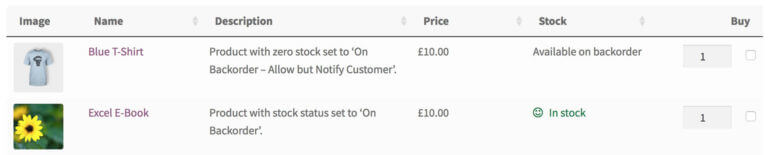
<center>Fig 2. Example of backorder (Figure obtained from  <a href="https://barn2.com/kb/backorder-products-variations/">here</a>
). </center>


## How to avoid backorders?

Manage the supply chain, warehousing and inventory where the number of products should be considered and predicted so as not to increase the cost of storage, and therefore not to affect the prices of the products.


This work is based on the Predict Product Backorders dataset. Originally performed by a Kaggle competition, in which we are going to work with a sample for our experiments and results.


## Proposal: Backorder prediction system

Backorders are unavoidable, but thanks to the prediction of the items that are considered in the backorder planning can be optimized in order to avoid costs, increase the production load, support logistics and support transportation planning to decrease costs and times.


# Data set

Many companies produce a large amount of structured data for each month of operation and this generates a large amount of historical data, using this data correctly in order to design a predictive model to forecast the order backlog and plan accordingly. 

For the acquisition of this data we used the dataset of a challenge of the [kaggle](https://www.kaggle.com/competitions/untadta/overview/evaluation), which can be found openly on [this github repository](https://github.com/rammel/DL).

**This dataset has some variables with missing data of 7% and with an unbalance where one class is 81% and the other 19%.**

# Data analysis

For this project, before thinking about generating a prediction model, it is important to identify, highlight and analyze the data set, based on its characteristics and limitations.

## Implementation Code

Code used for data analysis and conditioning it for the model to be used.


### Check the  dataset 

Data file contains the historical data for the 8 weeks prior to the week we are trying to predict. The dataset contains 23 variables including

|     |     |     | | | |
| --- | --- | --- | - | - | - |
| **sku** Product ID | **national_inv** Current inventory level for the part |**lead_time** Transit time for product | **in_transit_qty** Amount of product in transit from source|**forecast_3_month** Forecast sales for the next 3 months | **forecast_6_month** Forecast sales for the next 6 months|
|**forecast_9_month** Forecast sales for the next 9 months|**sales_1_month** Sales quantity for the prior 1 month time period|**sales_3_month** Sales quantity for the prior 3 month time period |**sales_6_month** Sales quantity for the prior 6 month time period |**sales_9_month** Sales quantity for the prior 9 month time period |**min_bank** Minimum recommend amount to stock 
|**potential_issue** Source issue for part identified |**pieces_past_due** Parts overdue from source |**perf_6_month_avg** Source performance for prior 6 month period |**perf_12_month_avg** Source performance for prior 12 month period |**local_bo_qty** Amount of stock orders overdue|**deck_risk** Part risk flag
|**oe_constraint** Part risk flag | **ppap_risk** Part risk flag | **stop_auto_buy** Part risk flag | **rev_stop** Part risk flag| **went_on_backorder** – Product actually went on backorder. <font color='green'>This is the target value</font>.

### Data Pre-processing

Is important consider different libraries, to  save and load csv  files, with matemathical operation  as  pandas, numpy. Skelearn in case you want to split the dataset in train and test set and normalization of the sets. Matplotlib to show the different graphs and plots about the dataset.


In [182]:
%load_ext autoreload
%autoreload 2

# to use dataframe and load csv file
import pandas as pd

# to use for mathematical operations 
import numpy as np

# split the set in 2 set, common train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# plot different designs
import matplotlib.pyplot as plt
%matplotlib inline  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


###### Random seed for reproducibility

In case of reproducing the code it is important to consider the numpy seed, for this purpose the following cell is used

In [183]:
np.random.seed(123)

#### Loading the data

Consider the dataset in a csv called BackOrders

In [184]:
data = pd.read_csv("dataset/BackOrders.csv",header=0)

The size of this data set are 23 variables wtih 61589 items

In [185]:
data.shape

(61589, 23)

To confirm that they are the same database, the header of the 23 columns that are the titles and the first 5 items

In [186]:
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No


The raw data without any processing has 7 categorical variables, at least one variable with missing values and the variables perf_6_month_avg, perf_12_month_avg have a negative value that causes conflict.

the next code replace the categorical in a binary value 0/1.

In [187]:
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:    
    data[col]=pd.factorize(data[col])[0]

In [188]:
data.describe(include='all')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,6.158900e+04,61589.000000,58186.000000,61589.000000,6.158900e+04,6.158900e+04,6.158900e+04,61589.000000,61589.000000,6.158900e+04,...,61589.000000,61589.000000,61589.000000,61589.000000,61589.000000,61589.000000,61589.000000,61589.000000,61589.000000,61589.000000
mean,2.037188e+06,287.721882,7.559619,30.192843,1.692728e+02,3.150413e+02,4.535760e+02,44.742957,150.732631,2.835465e+02,...,1.605400,-6.264182,-5.863664,1.205361,0.218286,0.000195,0.873403,0.037117,0.000325,0.183361
std,6.564178e+05,4233.906931,6.498952,792.869253,5.286742e+03,9.774362e+03,1.420201e+04,1373.805831,5224.959649,8.872270e+03,...,42.309229,25.537906,24.844514,29.981155,0.413086,0.013957,0.332524,0.189050,0.018018,0.386965
min,1.068628e+06,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.498574e+06,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.620000,0.640000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.898033e+06,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,4.000000e+00,...,0.000000,0.820000,0.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.314826e+06,57.000000,8.000000,0.000000,1.200000e+01,2.500000e+01,3.600000e+01,6.000000,17.000000,3.400000e+01,...,0.000000,0.960000,0.950000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3.284895e+06,673445.000000,52.000000,170976.000000,1.126656e+06,2.094336e+06,3.062016e+06,295197.000000,934593.000000,1.799099e+06,...,7392.000000,1.000000,1.000000,2999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Is important replace the negative value -99 for the variables perf_6_month_avg, perf_12_month_avg; and consider missing value.

In [189]:
data['perf_6_month_avg']=data['perf_6_month_avg'].replace(-99, np.NaN)
data['perf_12_month_avg']=data['perf_12_month_avg'].replace(-99, np.NaN)

In order to check the characteristics and whether they interact with each other, a correlation matrix is made, and following this matrix it is found that 5 variables do not affect the others.

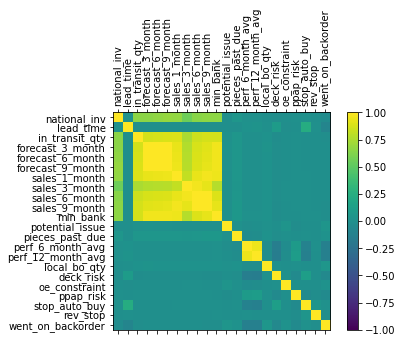

In [190]:
varnames=list(data)[1:]    
correlations = data[varnames].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,22,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(varnames,rotation=90)
ax.set_yticklabels(varnames)
plt.show()

The 5 variables that are of lesser importance and can be eliminated are 

- rev_stop
- oe_constraint
- potential_issue
- stop_auto_buy
- deck_risk


In [191]:
data.drop('rev_stop', axis=1, inplace=True)
data.drop('oe_constraint', axis=1, inplace=True)
data.drop('potential_issue', axis=1, inplace=True)
data.drop('stop_auto_buy', axis=1, inplace=True)
data.drop('deck_risk', axis=1, inplace=True)


To check the percentage of missing values found in the dataset, use the method `check_missing(data)`. We can see that there are only 3 variables with the highest loss being perf_6_month_avg with 7%, followed by perf_12_month_avg with 6.6% and lead_time with 5.5%.

In [192]:
def check_missing(data):
    tot = data.isnull().sum().sort_values(ascending=False)
    perc = ( round(100*data.isnull().sum()/data.isnull().count(),1) ).sort_values(ascending=False)
    missing_data = pd.concat([tot, perc], axis=1, keys=['Missing', 'Percent'])
    return missing_data[:3]
    
check_missing(data)

,Missing,Percent
perf_6_month_avg,4341,7.0
perf_12_month_avg,4091,6.6
lead_time,3403,5.5


For this purpose, we will impute the variables and pass the median to these 3 variables in order to keep them correctly.

In [193]:
data.fillna(data.median(), inplace=True)
data

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,ppap_risk,went_on_backorder
0,1888279,117,8.0,0,0,0,0,0,0,15,15,1,0,0.84,0.82,0,0,0
1,1870557,7,2.0,0,0,0,0,0,0,0,0,0,0,0.50,0.28,0,1,0
2,1475481,258,15.0,10,10,77,184,46,132,256,365,47,0,0.54,0.70,0,1,0
3,1758220,46,2.0,0,0,0,0,1,2,6,9,1,0,0.75,0.90,0,1,0
4,1360312,2,2.0,0,4,6,10,2,2,5,6,0,0,0.97,0.92,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61584,1397275,6,8.0,0,24,24,24,0,7,9,12,1,0,0.98,0.98,0,1,0
61585,3072139,130,2.0,0,40,80,140,18,108,230,317,34,0,0.51,0.28,0,1,0
61586,1909363,135,9.0,0,0,0,0,10,40,65,89,2,0,1.00,0.99,0,0,0
61587,1845783,63,8.0,0,0,0,0,452,1715,3425,4864,542,0,0.84,0.82,1,1,1


check that they are no longer missing values with the same function, `check_missing(data)`

In [194]:
check_missing(data)

,Missing,Percent
sku,0,0.0
national_inv,0,0.0
ppap_risk,0,0.0


The last variable to delete is 'sku' since it only represents the ID.

In [195]:
data.drop('sku', axis=1, inplace=True)
data

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,ppap_risk,went_on_backorder
0,117,8.0,0,0,0,0,0,0,15,15,1,0,0.84,0.82,0,0,0
1,7,2.0,0,0,0,0,0,0,0,0,0,0,0.50,0.28,0,1,0
2,258,15.0,10,10,77,184,46,132,256,365,47,0,0.54,0.70,0,1,0
3,46,2.0,0,0,0,0,1,2,6,9,1,0,0.75,0.90,0,1,0
4,2,2.0,0,4,6,10,2,2,5,6,0,0,0.97,0.92,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61584,6,8.0,0,24,24,24,0,7,9,12,1,0,0.98,0.98,0,1,0
61585,130,2.0,0,40,80,140,18,108,230,317,34,0,0.51,0.28,0,1,0
61586,135,9.0,0,0,0,0,10,40,65,89,2,0,1.00,0.99,0,0,0
61587,63,8.0,0,0,0,0,452,1715,3425,4864,542,0,0.84,0.82,1,1,1


#### Train-Test Split

The variable to predict is `went_on_backorder`, so 16 are the variables to learn the model, and save in the matrix X, and  y save the binary classes `0/1`.

In [196]:
X, y = data.loc[:,data.columns!='went_on_backorder'].values, data.loc[:,'went_on_backorder'].values
X,y

(array([[117.  ,   8.  ,   0.  , ...,   0.82,   0.  ,   0.  ],
        [  7.  ,   2.  ,   0.  , ...,   0.28,   0.  ,   1.  ],
        [258.  ,  15.  ,  10.  , ...,   0.7 ,   0.  ,   1.  ],
        ...,
        [135.  ,   9.  ,   0.  , ...,   0.99,   0.  ,   0.  ],
        [ 63.  ,   8.  ,   0.  , ...,   0.82,   1.  ,   1.  ],
        [  0.  ,   2.  ,   0.  , ...,   0.78,   0.  ,   1.  ]]),
 array([0, 0, 0, ..., 0, 1, 1]))

Using sklearn.model_selection.train_test_split, where this split arrays or matrices into train and test subsets. the 90% of the data are save in train set.  

In [197]:
X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.1, random_state=123, stratify = data['went_on_backorder'])

Check the dimension of the train and test sets.

In [198]:
print(X_train_1.shape)
print(X_test.shape)

(55430, 16)
(6159, 16)


There is an imbalance of classes where approximately 81% belong to class 0 and 19% to class 1.

In [199]:
print(pd.value_counts(y_train)/y_train.size * 100)
print(pd.value_counts(y_test)/y_test.size * 100)

1    50.406665
0    49.593335
dtype: float64
0    81.669102
1    18.330898
dtype: float64


To balance the training data a function is generated that reduces in two ways one to approximate a proportion to the test data, since there is a tendency that there will always be few backorder cases, and one with just the same number of classes for training.

In [200]:
def balance_split(X_train_1,y_train_1,flag=""):
    X_train0 = []
    X_train1 = []

    y_train0 = []
    y_train1 = []

    for i in range(len(y_train_1)):
        if y_train_1[i] == 0:
            X_train0.append(X_train_1[i])
            y_train0.append(y_train_1[i])
        else:
            X_train1.append(X_train_1[i])
            y_train1.append(y_train_1[i])
            
    X_train =[]
    y_train = []
    
    if flag == "fair":
        X_train = X_train0[:1000] + X_train1[:1000]
        y_train = y_train0[:1000] + y_train1[:1000]
    else:
        X_train = X_train0[:10000] + X_train1
        y_train = y_train0[:10000] + y_train1
    
    return np.asarray(X_train),np.asarray(y_train)

the dataset can be saved in two formats, the classic full dataset with approximately 25000 training data and approximately 6000 test data, or just the same size test and 200 training data.

In [201]:
def save_data(X_train_1,y_train_1,flag="",name=""):
    if flag == "fair":
        X_train,y_train = balance_split(X_train_1,y_train_1,flag)
        df_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
        df_train.to_csv("dataset/fair_"+name+".csv", index=False)
    else:
        X_train,y_train = balance_split(X_train_1,y_train_1)
        df_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
        df_train.to_csv("dataset/classic_"+name+".csv", index=False)

apply the methos `save_data` for both cases fair and classical in train data

In [202]:
#classic data
save_data(X_train_1,y_train_1,flag="classic",name="train")
#fair data
save_data(X_train_1,y_train_1,flag="fair",name="train")

apply the methos `save_data` for both cases fair and classical in test data

In [203]:
#classic data
save_data(X_test,y_test,flag="classic",name="test")

Finally, we load the files and we correct the dimensions of these for the classic is **((20164, 16), (20164,))** and for the fair is **((2000, 16), (2000,))** for train set

In [204]:
data = pd.read_csv("dataset/classic_train.csv")
X,y = data[data.columns[:16]].values, data[data.columns[16]].values
X.shape, y.shape

((20164, 16), (20164,))

In [205]:
data = pd.read_csv("dataset/fair_train.csv")
X,y = data[data.columns[:16]].values, data[data.columns[16]].values
X.shape, y.shape

((2000, 16), (2000,))

Finally, we load the files and we correct the dimensions of these for the classic and fair are  **((6159, 16), (6159,))** for test set

In [206]:
data = pd.read_csv("dataset/classic_test.csv")
X,y = data[data.columns[:16]].values, data[data.columns[16]].values
X.shape, y.shape

((6159, 16), (6159,))